In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

coverage_probability(A, α) = count(≥(α), A)/length(A)

coverage_probability (generic function with 1 method)

In [2]:
function sim(dist, n; L=10^6)
    μ, σ² = mean(dist), var(dist)
    nths = Threads.nthreads()
    Xtmp = [Vector{Float64}(undef, n) for _ in 1:nths]
    X̄ = Vector{Float64}(undef, L)
    S² = similar(X̄)
    T = similar(X̄)
    Chi² = similar(X̄)
    pvalT = similar(X̄)
    pvalChi² = similar(X̄)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid])
        x̄, s² = mean(X), var(X)
        t = (x̄ - μ)/√(s²/n)
        chi² = (n-1)*s²/σ²
        X̄[i] = x̄
        S²[i] = s²
        T[i] = t
        Chi²[i] = chi²
        pvalT[i] = 2ccdf(TDist(n-1), abs(t))
        pvalChi²[i] = min(1, 2cdf(Chisq(n-1), chi²), 2ccdf(Chisq(n-1), chi²))
    end
    X̄, S², T, Chi², pvalT, pvalChi²
end

sim (generic function with 1 method)

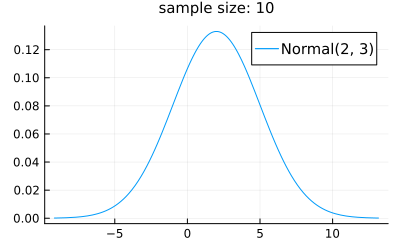

  1.113208 seconds (2.45 M allocations: 576.362 MiB, 8.22% gc time, 880.94% compilation time)
coverage_probability(pvalT, 0.05) = 0.950003
coverage_probability(pvalChi², 0.05) = 0.949697


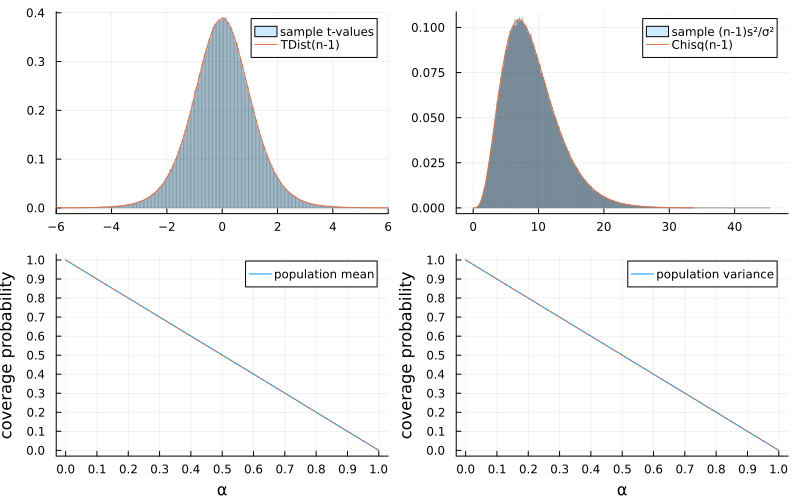

In [3]:
dist = Normal(2, 3)
n = 10

plot(dist; label="Normal(2, 3)", legendfontsize=10)
title!("sample size: $n", titlefontsize=10)
plot!(size=(400, 250)) |> display

X̄, S², T, Chi², pvalT, pvalChi² = @time sim(dist, n)
@show coverage_probability(pvalT, 0.05) coverage_probability(pvalChi², 0.05)

P = histogram(T; normed=true, alpha=0.2, label="sample t-values")
plot!(TDist(n-1); label="TDist(n-1)")
plot!(xlim=(-6, 6))

Q = histogram(Chi²; normed=true, alpha=0.2, label="sample (n-1)s²/σ²")
plot!(Chisq(n-1), label="Chisq(n-1)")

R = plot(α -> coverage_probability(pvalT, α), 0, 1;
    label="population mean")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

S = plot(α -> coverage_probability(pvalChi², α), 0, 1;
    label="population variance")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

plot(P, Q, R, S; size=(800, 500))

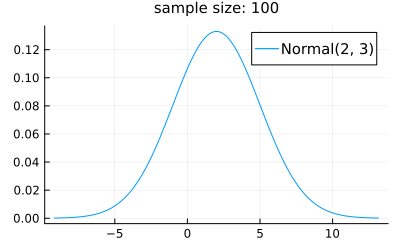

  0.169650 seconds (657.21 k allocations: 236.303 MiB, 3.68% gc time)
coverage_probability(pvalT, 0.05) = 0.949758
coverage_probability(pvalChi², 0.05) = 0.950303


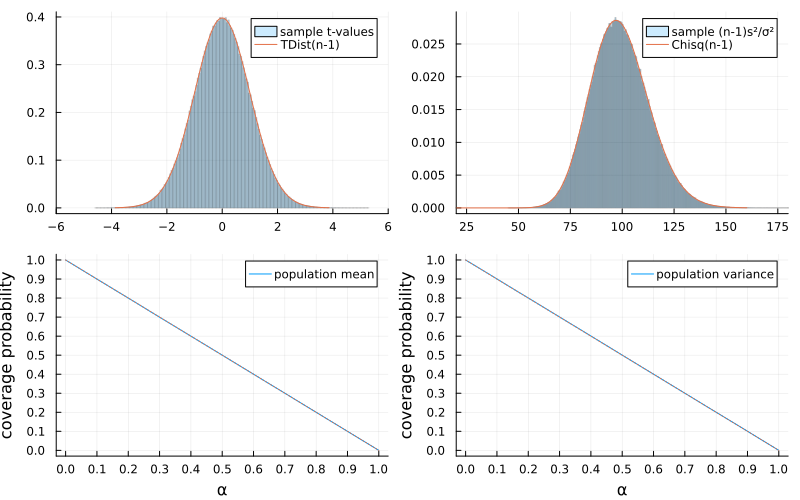

In [4]:
dist = Normal(2, 3)
n = 100

plot(dist; label="Normal(2, 3)", legendfontsize=10)
title!("sample size: $n", titlefontsize=10)
plot!(size=(400, 250)) |> display

X̄, S², T, Chi², pvalT, pvalChi² = @time sim(dist, n)
@show coverage_probability(pvalT, 0.05) coverage_probability(pvalChi², 0.05)

P = histogram(T; normed=true, alpha=0.2, label="sample t-values")
plot!(TDist(n-1); label="TDist(n-1)")
plot!(xlim=(-6, 6))

Q = histogram(Chi²; normed=true, alpha=0.2, label="sample (n-1)s²/σ²")
plot!(Chisq(n-1), label="Chisq(n-1)")
plot!(xlim=(max(0, n-8√n), n+8√n))

R = plot(α -> coverage_probability(pvalT, α), 0, 1;
    label="population mean")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

S = plot(α -> coverage_probability(pvalChi², α), 0, 1;
    label="population variance")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

plot(P, Q, R, S; size=(800, 500))

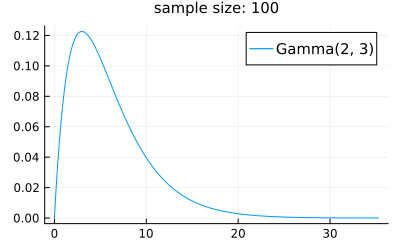

  0.631804 seconds (935.97 k allocations: 282.068 MiB, 272.23% compilation time)
coverage_probability(pvalT, 0.05) = 0.946015
coverage_probability(pvalChi², 0.05) = 0.7969


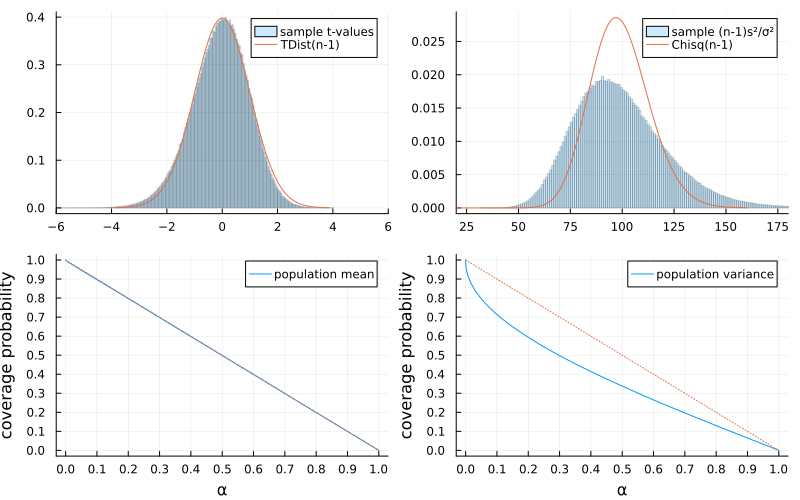

In [5]:
dist = Gamma(2, 3)
n = 100

plot(dist; label="Gamma(2, 3)", legendfontsize=10)
title!("sample size: $n", titlefontsize=10)
plot!(size=(400, 250)) |> display

X̄, S², T, Chi², pvalT, pvalChi² = @time sim(dist, n)
@show coverage_probability(pvalT, 0.05) coverage_probability(pvalChi², 0.05)

P = histogram(T; normed=true, alpha=0.2, label="sample t-values")
plot!(TDist(n-1); label="TDist(n-1)")
plot!(xlim=(-6, 6))

Q = histogram(Chi²; normed=true, alpha=0.2, label="sample (n-1)s²/σ²")
plot!(Chisq(n-1), label="Chisq(n-1)")
plot!(xlim=(max(0, n-8√n), n+8√n))

R = plot(α -> coverage_probability(pvalT, α), 0, 1;
    label="population mean")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

S = plot(α -> coverage_probability(pvalChi², α), 0, 1;
    label="population variance")
plot!(α -> 1 - α; label="", ls=:dot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="α", yguide="coverage probability")

plot(P, Q, R, S; size=(800, 500))